In [ ]:

import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras import layers,models
import os
import matplotlib.pyplot as plt

In [ ]:
#change path according to your system
base_dir='F:\datasets\covid'
train_dir=os.path.join(base_dir,'train')
test_dir=os.path.join(base_dir,'test')
train_covid_dir=os.path.join(train_dir,'Covid')
train_normal_dir=os.path.join(train_dir,'Normal')
train_pneumonia_dir=os.path.join(train_dir,'Pneumonia')
test_covid_dir=os.path.join(test_dir,'Covid')
test_normal_dir=os.path.join(test_dir,'Normal')
test_pneumonia_dir=os.path.join(test_dir,'Pneumonia')
print(train_covid_dir)
train_covid_num=len(os.listdir(train_covid_dir))
train_normal_num=len(os.listdir(train_normal_dir))
train_pneumonia_num=len(os.listdir(train_pneumonia_dir))
test_covid_num=len(os.listdir(test_covid_dir))
test_normal_num=len(os.listdir(test_normal_dir))
test_pneumonia_num=len(os.listdir(test_pneumonia_dir))
total_train_num=train_covid_num+train_normal_num+train_pneumonia_num
total_test_num=test_covid_num+test_normal_num+test_pneumonia_num
print(total_test_num)
print(total_train_num)




F:\datasets\covid\train\Covid


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'F:\\datasets\\covid\\train\\Covid'

In [ ]:
img_size=150
train_image_generator=ImageDataGenerator(rescale=1./255.0,rotation_range=0.2,vertical_flip=True,zoom_range=0.2,shear_range=0.2,height_shift_range=0.2,fill_mode='nearest')
test_image_generator=ImageDataGenerator(rescale=1./255.0)
train_data_gen=train_image_generator.flow_from_directory(train_dir,batch_size=32,shuffle=True,target_size=(img_size,img_size),class_mode='binary')
test_data_gen=test_image_generator.flow_from_directory(directory=test_dir,shuffle=True,batch_size=32,target_size=(img_size,img_size),class_mode='binary')
shape=150,150,3

In [ ]:
model=models.Sequential()
model.add(layers.Conv2D(64,(3,3),activation='relu',input_shape=(shape)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(124,activation='relu'))
model.add(layers.Dense(3,activation='softmax'))

model.summary()

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(train_data_gen,steps_per_epoch=int(np.ceil(total_train_num/32.0)),epochs=10,validation_steps=int(np.ceil(total_test_num/32.0)),validation_data=test_data_gen)

In [31]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

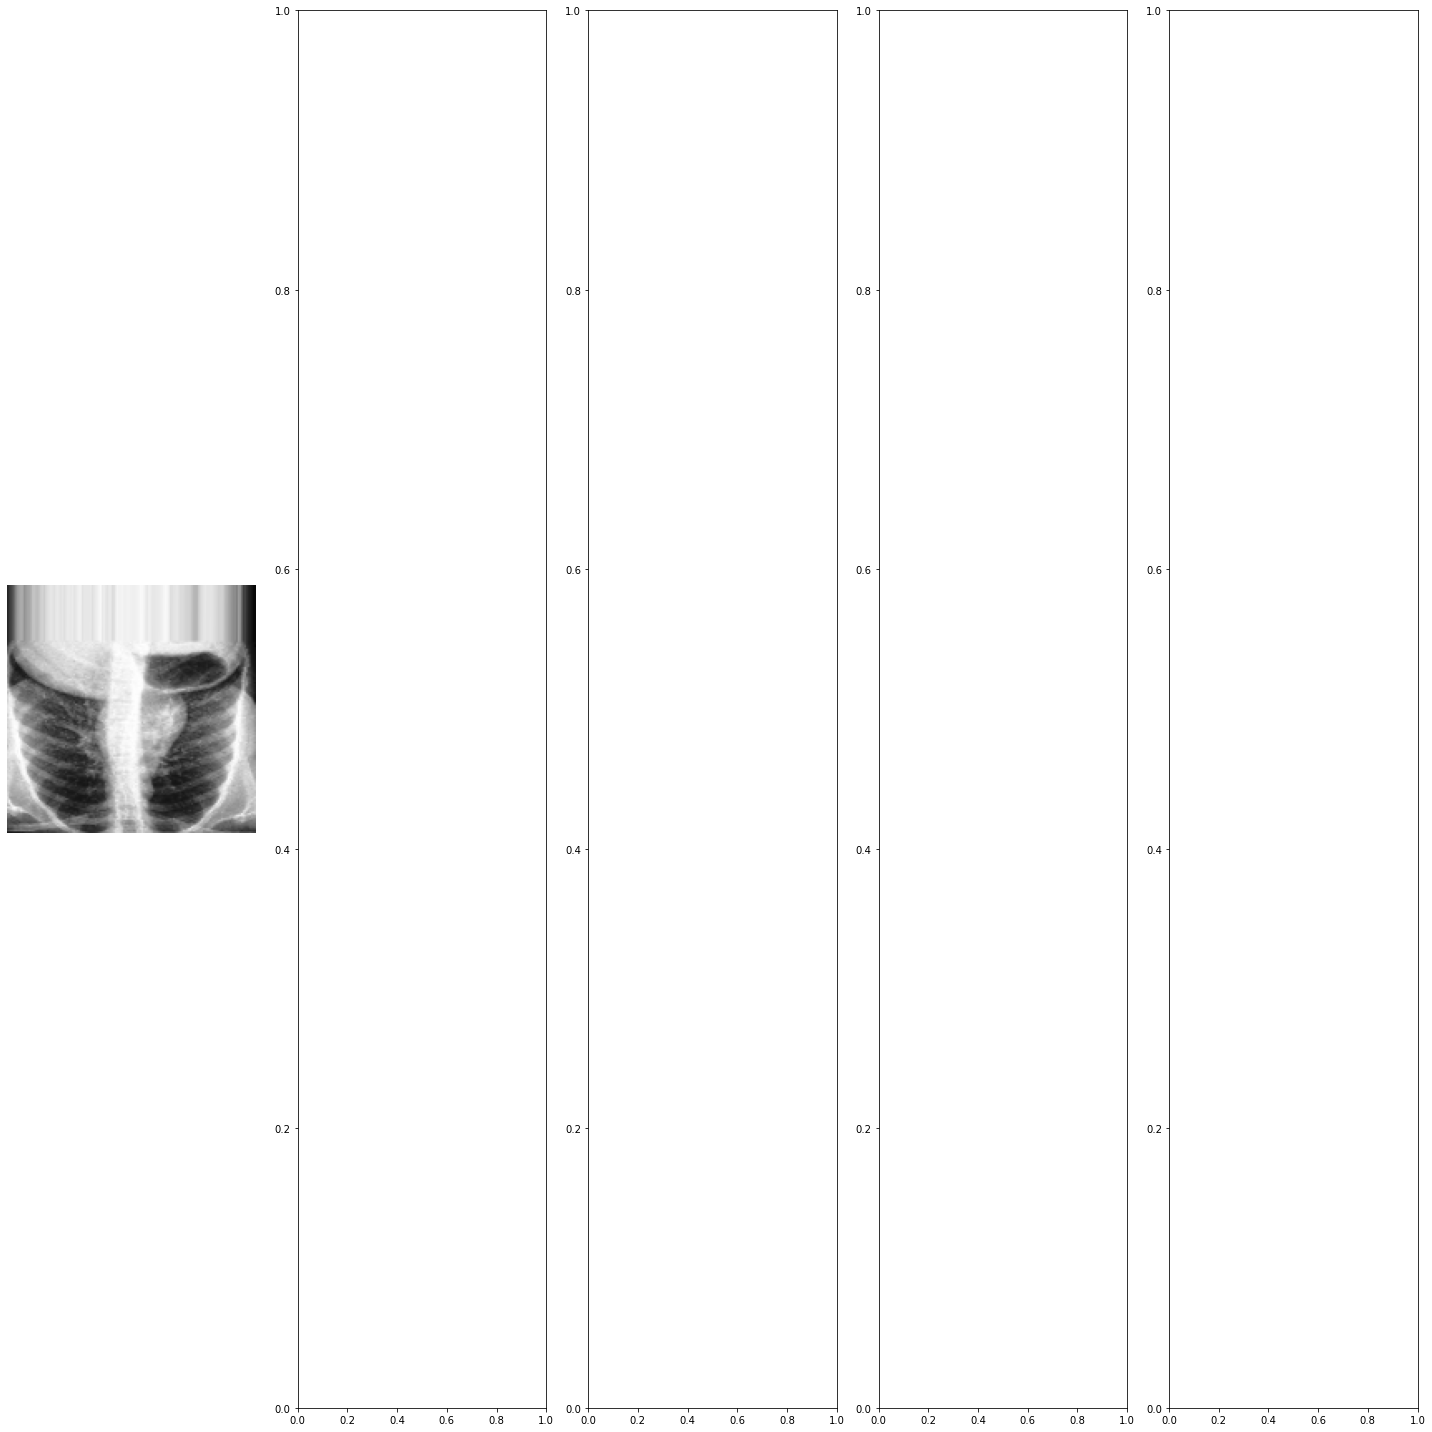

[[0.91492534 0.07705968 0.008015  ]]


In [33]:
aug_image=[train_data_gen[0][0][1]]
np_arr=np.array(aug_image)
plotImages(aug_image)
prediction=model.predict(np_arr)
print(prediction)
#print(np.argmax(prediction))